In [38]:
import os
from glob import glob
import random
import pickle


import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ujson as json

from config import *
from openpose_helpers import recover_npy

In [39]:
print(OPENPOSE_CONDENSED_OUTPUT)
print(OPENPOSE_NUM_KEYPTS)

/scratch/groups/mcfrank/Home_Headcam_new/outputs/openpose_condensed
130


In [40]:
# path to save the gold sample to
SAMPLE_DF_PATH = '/scratch/groups/mcfrank/Home_Headcam_new/Y_gold_sample.json'
# ensure reproducibility of sample (don't change this)
SEED = 0 
# number of frames in gold sample
NUM_FRAMES = 12000
# directory with the videos in it
VID_DIR = '/scratch/groups/mcfrank/Home_Headcam_new/Asacam/'

In [23]:
def gather_video_indices(dataframe_fps):
    # get list of tuples of ('video_name', frame_num)
    # representing a list of all the frames in the dataset
    # remember to sort the os.listdir so things don't change
    video_indices = []
    for i, df_fp in enumerate(dataframe_fps):
        print('iter ', i)
        # get filename w/o extension
        vid_name = os.path.splitext(os.path.basename(df_fp))[0]
        df = json.load(open(df_fp))
        video_indices.extend([(vid_name, frame_num) for frame_num in range(len(df['frame_num']))])
    return video_indices

def sample_video_indices(video_indices, num_frames, seed):
    # randomly sample the indices
    random.seed(seed)
    return random.sample(video_indices, num_frames)

def create_sample_dataframe(sample_indices):
    # create a Pandas dataframe with all the sample frames in it
    sample_df = pd.DataFrame({'vid_name': [s[0] for s in sample_indices],
                              'frame_num': [s[1] for s in sample_indices]})
    return sample_df

In [8]:
# dataframe_fps = glob(os.path.join(OPENPOSE_CONDENSED_OUTPUT, 'Y_*'))
# vid_indices = gather_video_indices(dataframe_fps)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter  108
iter  109
iter  110


In [32]:
# sorts by vid_name, then secondarily by frame_num
# ensures the sample is reproducible, no matter the order that glob returned the files above
vid_indices_sorted = sorted(vid_indices) 

In [41]:

sample_indices = sample_video_indices(vid_indices_sorted, NUM_FRAMES, SEED)

In [21]:
print(len(sample_indices))

12000


In [27]:
sample_df = create_sample_dataframe(sample_indices)
print(sample_df.info())
sample_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vid_name   12000 non-null  object
 1   frame_num  12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB
None


,vid_name,frame_num
0,Y_20190518_1504_03,19908
1,Y_20200131_2317_02,19663
2,Y_20191019_2005_01,18353
3,Y_20190726_1712_02,33997
4,Y_20181201_0917_01,15836


In [12]:
df = pd.read_json('/scratch/groups/mcfrank/Home_Headcam_new/outputs/openpose_condensed/Y_20200602_2719_02.json')
df.head()

,openpose_npy,frame_num
0,"[[[0.222568, 0.216384, 0.159241, 0.10406399999...",0
1,"[[[0.234738, 0.220439, 0.16947199999999998, 0....",1
2,"[[[0.234738, 0.22043000000000001, 0.169451, 0....",2
3,"[[[0.24088099999999998, 0.22658299999999998, 0...",3
4,"[[[0.251009, 0.23466, 0.18574000000000002, 0.1...",4


In [13]:
df['openpose_npy'][[17751, 20778, 21573, 24046, 24135]]

17751    [[[0.267405, 0.155159, 0.00406423, 0.0, 0.0, 0...
20778    [[[None, None, None, None, None, None, None, N...
21573    [[[None, None, None, None, None, None, None, N...
24046    [[[0.938948, 0.9389600000000001, 0.0, 0.0, 0.0...
24135    [[[None, None, None, None, None, None, None, N...
Name: openpose_npy, dtype: object

In [8]:
sample_df = sample_df.sort_values(['vid_name', 'frame_num'])
                     .reset_index(drop=True)
sample_df.head()

,vid_name,frame_num
0,Y_20180925_0711_01,775
1,Y_20180925_0711_01,1332
2,Y_20180925_0711_01,1880
3,Y_20180925_0711_01,1951
4,Y_20180925_0711_01,2207


In [9]:
sample_df.to_json(SAMPLE_DF_PATH)

In [11]:
sample_df = pd.read_json(SAMPLE_DF_PATH)
sample_df.tail()

,vid_name,frame_num,openpose_npy
11995,Y_20200602_2719_02,17751,"[[[0.267405, 0.155159, 0.00406423, 0.0, 0.0, 0..."
11996,Y_20200602_2719_02,20778,"[[[None, None, None, None, None, None, None, N..."
11997,Y_20200602_2719_02,21573,"[[[None, None, None, None, None, None, None, N..."
11998,Y_20200602_2719_02,24046,"[[[0.938948, 0.9389600000000001, 0.0, 0.0, 0.0..."
11999,Y_20200602_2719_02,24135,"[[[None, None, None, None, None, None, None, N..."


In [5]:
def collect_openpose_npys(sample_df):
    openpose_npys = pd.Series()
    # for each video:
    for i, (vid_name, df) in enumerate(sample_df.groupby('vid_name')):
        print(i)
        vid_df = pd.read_json(os.path.join(OPENPOSE_CONDENSED_OUTPUT, 
                                           vid_name + '.json'))
        # collect that video's gold sample frames' Openpose outputs
        vid_sample_frames = vid_df['openpose_npy'][df['frame_num'].values]
        openpose_npys = pd.concat([openpose_npys, vid_sample_frames])
    openpose_npys = openpose_npys.reset_index(drop=True)
    openpose_npys.to_pickle('Y_openpose_npys.p')
    return openpose_npys

sample_df['openpose_npy'] = collect_openpose_npys(sample_df)

/home/users/agrawalk/miniconda3/envs/headcam/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
openpose_npys = pd.read_pickle('Y_openpose_npys.p')
len(openpose_npys)

12000

In [6]:
openpose_npys.tail()

11995    [[[0.267405, 0.155159, 0.00406423, 0.0, 0.0, 0...
11996    [[[None, None, None, None, None, None, None, N...
11997    [[[None, None, None, None, None, None, None, N...
11998    [[[0.938948, 0.9389600000000001, 0.0, 0.0, 0.0...
11999    [[[None, None, None, None, None, None, None, N...
dtype: object

In [6]:
sample_df.to_json(SAMPLE_DF_PATH)

In [89]:
# Sanity check Openpose by pulling a random frame and seeing if keypoints align with
# people's bodies

def get_frame(vid_path, frame, flip_img):
    cap = cv2.VideoCapture(vid_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    img = cap.read()[1]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if flip_img:
        img = cv2.rotate(img, cv2.ROTATE_180)
    return img

def sanity_check_op_keypts(vid_name, vid_dir, frame_num, openpose_npy, 
                           keypts_normalized=True,
                           flip_img=True):
    """
    Plot a frame in a video containing openpose 
    keypoints to sanity-check that the openpose keypoints appear sensible.
    
    Arguments:
    vid_name          -- name of the video (no extension) to check
    frame_num         -- frame number of that video to check
    openpose_npy      -- the Openpose keypoints extracted for the given video and frame
    keypts_normalized -- True if keypoints in Openpose outputs are normalized
    (i.e. x and y values in range [0, 1]), else False
    """
    vid_path = os.path.join(vid_dir, vid_name + '.mp4')
    img = get_frame(vid_path, frame_num, flip_img)
    plt.figure(figsize=(10, img.shape[0]/img.shape[1]*10))
    x_factor = img.shape[1] if keypts_normalized else 1
    y_factor = img.shape[0] if keypts_normalized else 1
    for person in openpose_npy:
        plt.scatter(person[0, NPY_FACE_START:NPY_FACE_END]*x_factor, 
                    person[1, NPY_FACE_START:NPY_FACE_END]*y_factor, 
                    c='C0', s=8, label='Face keypoints')
        plt.scatter(person[0, NPY_POSE_START:NPY_POSE_END]*x_factor,  
                    person[1, NPY_POSE_START:NPY_POSE_END]*y_factor,  
                    c='C1', s=8, label='Pose keypoints')
        plt.scatter(person[0, NPY_HAND_LEFT_START:NPY_HAND_LEFT_END]*x_factor,   
                    person[1, NPY_HAND_LEFT_START:NPY_HAND_LEFT_END]*y_factor,   
                    c='C2', s=8, label='Left hand keypoints')
        plt.scatter(person[0, NPY_HAND_RIGHT_START:NPY_HAND_RIGHT_END]*x_factor,    
                    person[1, NPY_HAND_RIGHT_START:NPY_HAND_RIGHT_END]*y_factor,    
                    c='C3', s=8, label='Right hand keypoints')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())    
    plt.imshow(img)

In [92]:
def recover_sample_openpose_npy(sample_df):
    max_num_people = max(len(op_npy) for op_npy in sample_df['openpose_npy'])
    openpose_npy_full = np.full((len(sample_df), # num frames
                                 max_num_people, # max number of people in the sample df
                                 3,              # slices for each of (x, y, conf)
                                 OPENPOSE_NUM_KEYPTS), # keypoints per slice (130)
                                np.NaN)
    for i, op_keypts in enumerate(sample_df['openpose_npy']):
        op_npy = np.array(op_keypts)
        openpose_npy_full[i, 
                          :op_npy.shape[0], 
                          :op_npy.shape[1], 
                          :op_npy.shape[2]] = op_npy
    return openpose_npy_full

In [93]:
openpose_npy_full = recover_sample_openpose_npy(sample_df)

In [94]:
openpose_npy_full.shape

(12000, 25, 3, 130)

In [95]:
def remove_nan_slices(openpose_npy_full):
    # due to the fact that sample frames were collected from many videos,
    # the max_num_people is much higher than it should be.
    num_people = 1
    while not np.all(np.isnan(openpose_npy_full[:, num_people, :,:])):
        num_people += 1
    openpose_npy_full_small = openpose_npy_full[:, :num_people, :,:]
    for i in range(num_people):
        assert(not np.all(np.isnan(openpose_npy_full[:, i, :,:])))
    return openpose_npy_full_small

In [99]:
openpose_npy_full_clean = remove_nan_slices(openpose_npy_full)

In [100]:
openpose_npy_full_clean.shape

(12000, 14, 3, 130)

In [106]:
sample_df['openpose_npy'] = list(openpose_npy_full_clean)

In [107]:
sample_df.head()

,vid_name,frame_num,openpose_npy
0,Y_20180925_0711_01,775,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
1,Y_20180925_0711_01,1332,"[[[0.34696499999999997, 0.41028499999999996, 0..."
2,Y_20180925_0711_01,1880,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
3,Y_20180925_0711_01,1951,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."
4,Y_20180925_0711_01,2207,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan..."


In [109]:
sample_df.to_json(SAMPLE_DF_PATH)

In [101]:
for i in range(len(openpose_npy_full_clean)):
    # find the frames with (max in the whole sample = 14) people + inspect
    if not np.all(np.isnan(openpose_npy_full_clean[i, -1, :])):
        print(i)

5766
9807


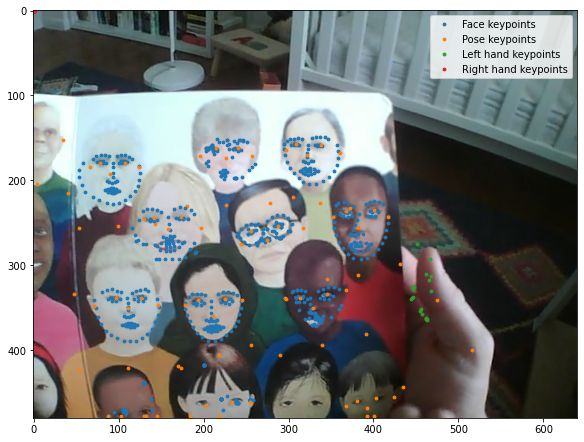

In [102]:
# abnormally large number of people detected
idx = 5766
vid_name = sample_df.loc[idx, 'vid_name']
frame_num = sample_df.loc[idx, 'frame_num']
openpose_npy = openpose_npy_full_small[idx]

sanity_check_op_keypts(vid_name, VID_DIR, frame_num, openpose_npy)

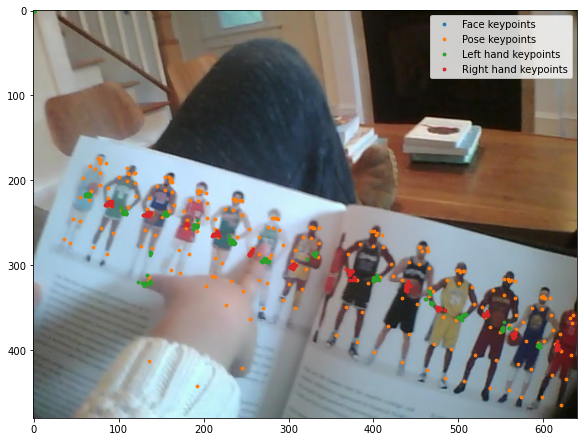

In [90]:
# abnormally large number of people detected
idx = 9807
vid_name = sample_df.loc[idx, 'vid_name']
frame_num = sample_df.loc[idx, 'frame_num']
openpose_npy = openpose_npy_full_small[idx]

sanity_check_op_keypts(vid_name, VID_DIR, frame_num, openpose_npy)

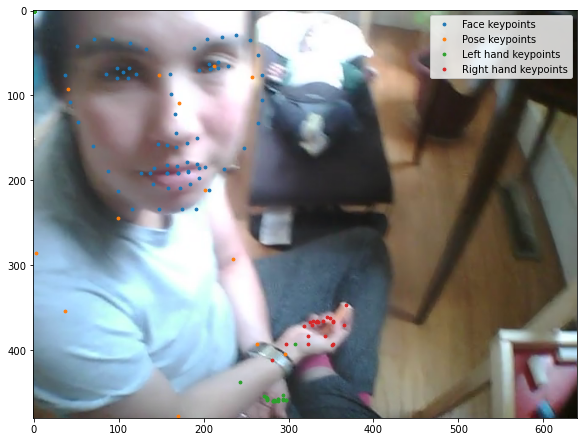

In [103]:
# another random frame
idx = 11995
vid_name = sample_df.loc[idx, 'vid_name']
frame_num = sample_df.loc[idx, 'frame_num']
openpose_npy = openpose_npy_full_small[idx]

sanity_check_op_keypts(vid_name, VID_DIR, frame_num, openpose_npy)

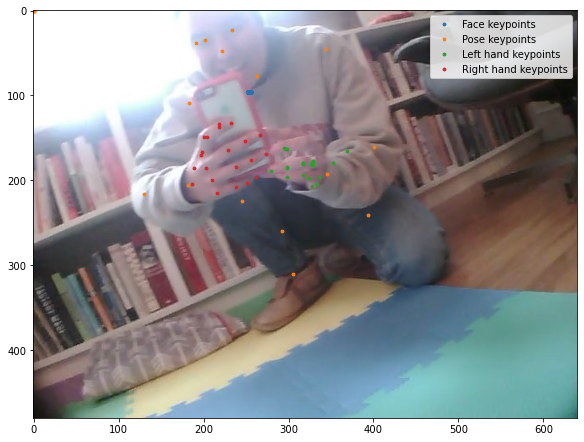

In [108]:
# another random frame
idx = 1
vid_name = sample_df.loc[idx, 'vid_name']
frame_num = sample_df.loc[idx, 'frame_num']
openpose_npy = openpose_npy_full_small[idx]

sanity_check_op_keypts(vid_name, VID_DIR, frame_num, openpose_npy)